In [0]:
# importing our libraries as the last time to use in the data classification -- very important step which we use all the libraries from now on

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
matplotlib.style.use('ggplot')

In [0]:
#mounting our drive as we've said
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#reading the data along with the first column (ID column)
df = pd.read_csv('/content/drive/My Drive/Labs/Breast cancer classifier/wdbc.data' , names = ['ID', 'Diagnosis' , 'radius','texture','perimeter','area','smoothness','compactness','concavity'
,'concave_points','symmetry','fractal_dimension','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concave_pointsSE','symmetry_SE',
'fractional_dimenstionSE','radiusW','textureSW','perimeterW','areaW','smoothnessW','compactnessW','concavityW','concave_pointsW','symmetryW',
'fractional_dimensionsW'] )


In [0]:
# dropping the first column"ID", not important in classification
df = df.drop(['ID'],axis = 1)

In [0]:
df.head()

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# features will be X and Y is the Diagnosis feature (B, and M)
x = df.iloc[:,1:]
y = df['Diagnosis'].copy()
y =y.map({'B':0, 'M':1})
x

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
sss = StratifiedShuffleSplit(test_size=0.3, random_state=12)
for train_index, test_index in sss.split(x,y):
  print("TRAIN:", train_index, "\n TEST:", test_index)
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]

TRAIN: [552 100 315  39 553  80 159   7 400  72 508 295 486 189 266 331  84 215
 116 489 474 494  19  97  37  50   0 534 177 154 191   4 436 302 214 410
 490 166 476  53 260 287 528 500  90 403 507   6 370 548 239  28 151 444
 430  35 523   3 540 272 414  93  30  92 307 288 473   5 264 290 132 413
 156 387 543  25 371 122 396 471 261  73 477 547 360 121 564 429  86 485
 511  69 346 309 382 105 118  58 468 406  75  78 276 124 201 426 320 161
  51 123  36 225  91 279 270 533  14 199 388 459 332  85 217 162  29 236
 496  23 262   1 127 363 542 565 401 355  83 555 113 504 297 278 554 536
 417 458  95 134 502  11 411 212 205 223 391 456 284 310  56 343 316 285
  49 170 337 102 152 335 383 356 327 420 106 268 277 240 208 461 312 328
 465 439 497  70 478 457 249 342 446 499 352 545 257 463 128 218  74  20
 198  67 165 475 484 369 169 109 111  79  60 318 512 361  47 546 143 271
  13 325  31  26 196 141 112  66  82 479 447 273 349 296 334 470 197 389
 556 353   2 305 541 483 210 491 517 365 501

In [0]:
# First we are going to normalize the data
from sklearn.preprocessing import Normalizer
# The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

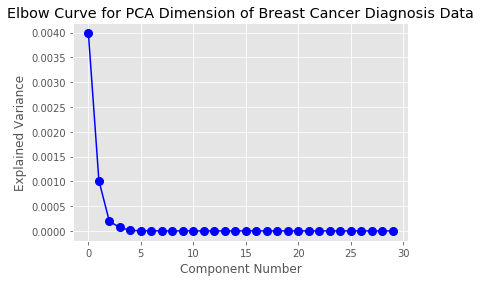

In [0]:
# Instantiate PCA for the train data
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

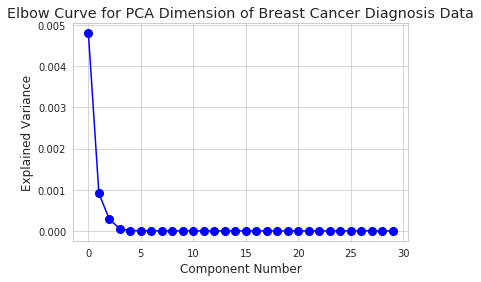

In [0]:
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_test_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

In [0]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(np.round(k_scores,4))

[0.9122 0.9096 0.9095 0.9171 0.9296 0.9119 0.9221 0.9196 0.9246 0.9196
 0.9346 0.9321 0.9321 0.9246 0.9296 0.9246 0.9246 0.9221 0.9246 0.9246
 0.9221 0.9221 0.9221 0.9221 0.9221 0.9221 0.9171 0.9119 0.9094 0.9119
 0.9069 0.9094 0.9069 0.9094 0.9044 0.9044 0.9019 0.9044 0.9019 0.9019
 0.9019 0.9044 0.9069 0.9044 0.9019 0.9044 0.902  0.8969 0.8969]


In [0]:
k_range=list(range(1,50))
parameters=dict(n_neighbors=k_range)
clf_knn=GridSearchCV(knn,parameters,cv=10,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy" )
clf_knn.fit(X_train,y_train)
print(clf_knn.best_params_)
print(np.round(clf_knn.best_score_,3))

from sklearn.metrics import accuracy_score,classification_report
pred=clf_knn.predict(X_test)
print("Accuracy_score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
cm = confusion_matrix( y_test ,pred)
cm

Tuning Hyper-Parameters for accuracy
{'n_neighbors': 11}
0.935
Accuracy_score:  0.9415204678362573
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



array([[103,   4],
       [  6,  58]])

In [0]:
from sklearn.svm import SVC
clf=SVC()
Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
#gammas = [0.001, 0.01, 0.1, 1,10,100,1000]
parameters={'C':[0.001, 0.01, 0.1, 1, 10,100,1000],  'kernel':['linear']}
clf_svm=GridSearchCV(clf,parameters,cv=10,scoring="accuracy")
print("Tuning Hyper-Parameters for accuracy")
clf_svm.fit(X_train,y_train)
print(clf_svm.best_params_)
print(np.round(clf_svm.best_score_,3))

predictions=clf_svm.predict(X_test)
print("Accuracy_score: ",accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
cm = confusion_matrix( y_test ,predictions)
cm

Tuning Hyper-Parameters for accuracy
{'C': 100, 'kernel': 'linear'}
0.965
Accuracy_score:  0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



array([[104,   3],
       [  6,  58]])

In [0]:
from sklearn.svm import SVC
clf_2=SVC()
Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
gammas = [0.001, 0.01, 0.1, 1,10,100,1000]
parameters={'C':[0.001, 0.01, 0.1, 1, 10,100,1000], 'gamma':[0.001, 0.01, 0.1, 1,10,100,1000], 'kernel':['rbf']}
clf_svm_2=GridSearchCV(clf_2,parameters,cv=10,scoring="accuracy")
print("Tuning Hyper-Parameters for accuracy")
clf_svm_2.fit(X_train,y_train)
print(clf_svm_2.best_params_)
print(np.round(clf_svm_2.best_score_,3))

predictions_2=clf_svm_2.predict(X_test)
print("Accuracy_score: ",accuracy_score(y_test,predictions_2))
print(classification_report(y_test,predictions_2))
cm = confusion_matrix( y_test ,predictions_2)
cm

Tuning Hyper-Parameters for accuracy
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.925
Accuracy_score:  0.935672514619883
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.90      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



array([[100,   7],
       [  4,  60]])

In [0]:
log = LogisticRegression()
param_grid = {
    'C': [.01,.1,1]
}

grid = GridSearchCV(log, param_grid, cv = 7)
print(grid.fit(X_train, y_train))
print(grid.best_params_)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'C': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
log = LogisticRegression(C=1)
log.fit(X_train,y_train)
pred_log = log.predict(X_test)
print('Accuracy score of logistic regression is : ', accuracy_score(pred_log,y_test),'\n')
print(classification_report(y_test,pred_log))
cm = confusion_matrix( y_test ,pred_log)
cm

Accuracy score of logistic regression is :  0.9532163742690059 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[104,   3],
       [  5,  59]])